<a href="https://www.kaggle.com/code/ashutoshsethi/basic-neural-network?scriptVersionId=131292317" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gender-classification-dataset/gender_classification_v7.csv


In [2]:
df = pd.read_csv('/kaggle/input/gender-classification-dataset/gender_classification_v7.csv')

In [3]:
df.head()


,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [4]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['gender']=label_encoder.fit_transform(df['gender'])
df['forehead_width_cm']=df['forehead_width_cm'].astype(int)
df['forehead_height_cm']=df['forehead_height_cm'].astype(int)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   long_hair                  5001 non-null   int64
 1   forehead_width_cm          5001 non-null   int64
 2   forehead_height_cm         5001 non-null   int64
 3   nose_wide                  5001 non-null   int64
 4   nose_long                  5001 non-null   int64
 5   lips_thin                  5001 non-null   int64
 6   distance_nose_to_lip_long  5001 non-null   int64
 7   gender                     5001 non-null   int64
dtypes: int64(8)
memory usage: 312.7 KB


In [6]:
import tensorflow as tf

train_df = df.sample(frac=0.75, random_state=4)
 
val_df = df.drop(train_df.index)

## scaling the data

In [7]:
## calling to (0,1) range
max_val = train_df.max(axis= 0)
min_val = train_df.min(axis= 0)
 
range = max_val - min_val
train_df = (train_df - min_val)/(range)
 
val_df =  (val_df- min_val)/range

In [8]:
train_df.shape

(3751, 8)

In [9]:
train_df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
3919,1.0,0.50,0.5,1.0,1.0,1.0,0.0,1.0
2463,1.0,0.25,1.0,1.0,1.0,1.0,1.0,1.0
2154,1.0,0.25,0.5,0.0,0.0,0.0,0.0,0.0
2261,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0
2393,1.0,0.75,0.5,1.0,1.0,1.0,1.0,1.0


In [10]:
# now let's separate the targets and labels
X_train = train_df.drop('gender',axis=1)
X_val = val_df.drop('gender',axis=1)
y_train = train_df['gender']
y_val = val_df['gender']

In [11]:
input_shape = [X_train.shape[1]]
 
input_shape

[7]

# Create Model Neural Network


## Create a linear Model

In [12]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1,input_shape=input_shape)])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


## Ccreating a multilayer neural network

In [14]:
model = tf.keras.Sequential([
 
    tf.keras.layers.Dense(units=64, activation='relu',input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu',kernel_regularizer='l1'),
    tf.keras.layers.Dense(units=32),
    tf.keras.layers.Dense(units=1)
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 64)                512       
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 6,785
Trainable params: 6,785
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.compile(optimizer='adam',                
              # MAE error is good for
              # numerical predictions
              loss='mae') 

# Training the model

In [16]:
losses = model.fit(X_train, y_train,
 
                   validation_data=(X_val, y_val),
                    
                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=256,
                   epochs=25,  # total epoch
 
                   )

Epoch 1/25
15/15 [==============================] - 1s 15ms/step - loss: 4.4924 - val_loss: 4.0936
Epoch 2/25
15/15 [==============================] - 0s 4ms/step - loss: 3.8546 - val_loss: 3.5680
Epoch 3/25
15/15 [==============================] - 0s 4ms/step - loss: 3.3419 - val_loss: 3.0800
Epoch 4/25
15/15 [==============================] - 0s 4ms/step - loss: 2.8762 - val_loss: 2.6387
Epoch 5/25
15/15 [==============================] - 0s 4ms/step - loss: 2.4542 - val_loss: 2.2393
Epoch 6/25
15/15 [==============================] - 0s 4ms/step - loss: 2.0767 - val_loss: 1.8854
Epoch 7/25
15/15 [==============================] - 0s 4ms/step - loss: 1.7427 - val_loss: 1.5732
Epoch 8/25
15/15 [==============================] - 0s 4ms/step - loss: 1.4420 - val_loss: 1.2920
Epoch 9/25
15/15 [==============================] - 0s 4ms/step - loss: 1.1799 - val_loss: 1.0502
Epoch 10/25
15/15 [==============================] - 0s 4ms/step - loss: 0.9553 - val_loss: 0.8447
Epoch 11/25
15/15 

# generate predictions and analyze accuracy

In [17]:
# this will pass the first 3 rows of features
# of our data as input to make predictions
model.predict(X_val.iloc[0:3, :])

1/1 [==============================] - 0s 81ms/step


array([[ 0.7792275 ],
       [ 1.0091716 ],
       [-0.00732918]], dtype=float32)

In [18]:
y_val.iloc[0:3]

0    1.0
6    1.0
9    0.0
Name: gender, dtype: float64

# visualize training vs validation loss

<AxesSubplot: >

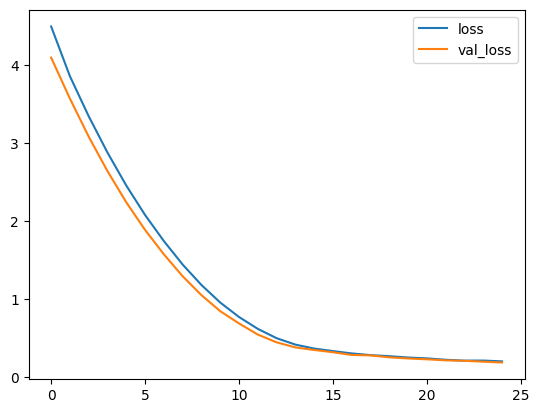

In [19]:
loss_df = pd.DataFrame(losses.history)
 
# history stores the loss/val
# loss in each epoch
 
# loss_df is a dataframe which
# contains the losses so we can
# plot it to visualize our model training
loss_df.loc[:,['loss','val_loss']].plot()